In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# importing the dataframe 

In [5]:
df1=pd.read_csv('D:\\python\\wind speed\\PRSA_Data_Nongzhanguan_20130301-20170228.csv')

In [6]:
df1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


# checking total no. of null values in all variables

In [7]:
df1.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

# droping the 'no' bcz there is no need of the column

In [8]:
df1.drop('No',axis='columns',inplace=True)

In [9]:
df1

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Nongzhanguan
35060,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Nongzhanguan
35061,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,NW,1.1,Nongzhanguan
35062,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Nongzhanguan


# importing the second dataframe 

In [10]:
df2=pd.read_csv('D:\\python\\wind speed\\PRSA_Data_Aotizhongxin_20130301-20170228.csv')

In [11]:
df2.drop('No',axis='columns',inplace=True)

In [12]:
df2.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [13]:
df2

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


# #as both the dataframe attributes and values are matching   
# bcz from the dataset is from nearby cities and values are same  

In [14]:
df=pd.concat([df1,df2],axis=0,ignore_index='True')
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
70124,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
70125,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
70126,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


# Descriptive stastistics of dataset by getting describe

In [15]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,70128.000000,70128.000000,70128.000000,70128.000000,68575.000000,68970.000000,68747.000000,68413.000000,67146.000000,67903.000000,70088.000000,70088.000000,70088.000000,70088.000000,70100.000000
mean,2014.662560,6.522930,15.729637,11.500000,83.810518,109.523589,18.037243,58.698579,1293.908304,57.463504,13.628049,1012.197170,2.785298,0.065720,1.784641
std,1.177205,3.448728,8.800155,6.922236,84.219918,95.283156,23.577271,36.711977,1233.831819,58.173520,11.428797,10.341142,13.753981,0.850419,1.245127
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,9.000000,3.100000,1003.600000,-8.500000,0.000000,1.000000
50%,2015.000000,7.000000,16.000000,11.500000,59.000000,86.000000,9.000000,52.000000,900.000000,44.000000,14.600000,1011.900000,3.400000,0.000000,1.500000
75%,2016.000000,10.000000,23.000000,17.250000,115.000000,152.000000,22.000000,81.000000,1600.000000,83.000000,23.400000,1020.600000,15.300000,0.000000,2.300000
max,2017.000000,12.000000,31.000000,23.000000,898.000000,995.000000,341.000000,290.000000,10000.000000,423.000000,41.100000,1042.000000,28.800000,72.500000,11.200000


In [16]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
PM2.5      1553
PM10       1158
SO2        1381
NO2        1715
CO         2982
O3         2225
TEMP         40
PRES         40
DEWP         40
RAIN         40
wd          159
WSPM         28
station       0
dtype: int64

In [17]:
df.corr()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000,-0.202010,-5.569082e-03,0.000000e+00,-0.025016,-0.054467,-0.179290,-0.093202,0.025714,0.031401,-0.143067,0.203245,-0.174418,0.001469,0.078865
month,-0.202010,1.000000,1.052232e-02,0.000000e+00,0.030077,-0.011726,-0.229076,0.091236,0.063080,-0.098566,0.131476,-0.013355,0.269210,0.014873,-0.143256
day,-0.005569,0.010522,1.000000e+00,-5.156202e-18,0.005946,0.028129,-0.009537,0.019780,-0.015741,0.003682,0.015089,0.020354,0.021708,-0.004398,-0.013058
hour,0.000000,0.000000,-5.156202e-18,1.000000e+00,-0.015257,0.014078,0.001249,-0.054370,-0.059110,0.299857,0.141637,-0.038318,-0.016679,0.008527,0.155715
PM2.5,-0.025016,0.030077,5.945509e-03,-1.525712e-02,1.000000,0.891618,0.508872,0.686464,0.800010,-0.175334,-0.152073,0.012149,0.108185,-0.017945,-0.289215
PM10,-0.054467,-0.011726,2.812884e-02,1.407841e-02,0.891618,1.000000,0.495616,0.664167,0.710733,-0.151021,-0.128508,-0.019064,0.056360,-0.030152,-0.194316
SO2,-0.179290,-0.229076,-9.537469e-03,1.249102e-03,0.508872,0.495616,1.000000,0.464951,0.555427,-0.194448,-0.355069,0.219459,-0.274946,-0.043271,-0.132708
NO2,-0.093202,0.091236,1.978027e-02,-5.436975e-02,0.686464,0.664167,0.464951,1.000000,0.696020,-0.512404,-0.271727,0.104566,0.024512,-0.045613,-0.479860
CO,0.025714,0.063080,-1.574124e-02,-5.911008e-02,0.800010,0.710733,0.555427,0.696020,1.000000,-0.320046,-0.343248,0.183680,-0.058183,-0.015964,-0.312049
O3,0.031401,-0.098566,3.681782e-03,2.998571e-01,-0.175334,-0.151021,-0.194448,-0.512404,-0.320046,1.000000,0.598979,-0.440026,0.304452,0.024510,0.326673


# droping colns bcz wedonot have to work need these colns

In [18]:
df.drop(['year','month','day','hour','station'],axis='columns',inplace=True)

In [19]:
df.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.891618,0.508872,0.686464,0.800010,-0.175334,-0.152073,0.012149,0.108185,-0.017945,-0.289215
PM10,0.891618,1.000000,0.495616,0.664167,0.710733,-0.151021,-0.128508,-0.019064,0.056360,-0.030152,-0.194316
SO2,0.508872,0.495616,1.000000,0.464951,0.555427,-0.194448,-0.355069,0.219459,-0.274946,-0.043271,-0.132708
NO2,0.686464,0.664167,0.464951,1.000000,0.696020,-0.512404,-0.271727,0.104566,0.024512,-0.045613,-0.479860
CO,0.800010,0.710733,0.555427,0.696020,1.000000,-0.320046,-0.343248,0.183680,-0.058183,-0.015964,-0.312049
O3,-0.175334,-0.151021,-0.194448,-0.512404,-0.320046,1.000000,0.598979,-0.440026,0.304452,0.024510,0.326673
TEMP,-0.152073,-0.128508,-0.355069,-0.271727,-0.343248,0.598979,1.000000,-0.831637,0.820722,0.037443,0.043690
PRES,0.012149,-0.019064,0.219459,0.104566,0.183680,-0.440026,-0.831637,1.000000,-0.773459,-0.062771,0.056416
DEWP,0.108185,0.056360,-0.274946,0.024512,-0.058183,0.304452,0.820722,-0.773459,1.000000,0.084549,-0.292307
RAIN,-0.017945,-0.030152,-0.043271,-0.045613,-0.015964,0.024510,0.037443,-0.062771,0.084549,1.000000,0.023653


# as we see the corelation b/w co and pm2.5 and pm10 

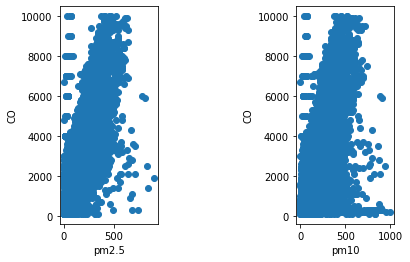

In [20]:
plt.subplot(1,3,1)
plt.scatter(df['PM2.5'],df['CO'])
plt.xlabel('pm2.5')
plt.ylabel('CO')

plt.subplot(1,3,3)
plt.scatter(df['PM10'],df['CO'])
plt.xlabel('pm10')
plt.ylabel('CO')
plt.show()

In [21]:
df[['PM2.5','PM10','CO']].describe()

,PM2.5,PM10,CO
count,68575.000000,68970.000000,67146.000000
mean,83.810518,109.523589,1293.908304
std,84.219918,95.283156,1233.831819
min,2.000000,2.000000,100.000000
25%,22.000000,38.000000,500.000000
50%,59.000000,86.000000,900.000000
75%,115.000000,152.000000,1600.000000
max,898.000000,995.000000,10000.000000


In [22]:
df.isnull().sum()

PM2.5    1553
PM10     1158
SO2      1381
NO2      1715
CO       2982
O3       2225
TEMP       40
PRES       40
DEWP       40
RAIN       40
wd        159
WSPM       28
dtype: int64

## we delete drop the nul values because the value were not going to fit the model bcz we donot donot the dat

In [23]:
df.dropna(inplace=True)
df.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

# but they doesnot help to perdict useful data
# so we check the other co-relation

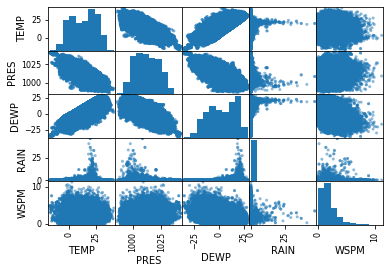

In [24]:
pd.plotting.scatter_matrix(df.loc[:,'TEMP':'WSPM'])
plt.show()

## as we see there is good inverse realtion b/w (pressure and temp) and and proptional (dewp and temp)

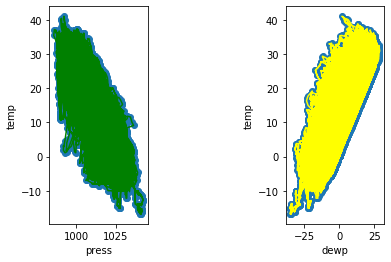

In [25]:
plt.subplot(1,3,1)
plt.scatter(df.PRES,df.TEMP)
plt.plot(df.PRES,df.TEMP,color = 'green')
plt.xlabel('press')
plt.ylabel('temp')


plt.subplot(1,3,3)
plt.scatter(df.DEWP,df.TEMP)
plt.plot(df.DEWP,df.TEMP,color='yellow')
plt.xlabel('dewp')
plt.ylabel('temp')
plt.show()

In [26]:
df[['PRES','TEMP']].describe()

,PRES,TEMP
count,64929.000000,64929.00000
mean,1012.154933,13.73627
std,10.308690,11.40929
min,985.900000,-16.80000
25%,1003.600000,3.30000
50%,1011.700000,14.70000
75%,1020.500000,23.40000
max,1042.000000,41.10000


Text(0, 0.5, 'temp')

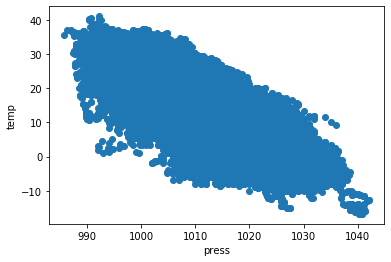

In [27]:
plt.scatter(df.PRES,df.TEMP)
plt.xlabel('press')
plt.ylabel('temp')


In [28]:
pres_temp=df[['PRES','TEMP']]
pres_temp.describe()

,PRES,TEMP
count,64929.000000,64929.00000
mean,1012.154933,13.73627
std,10.308690,11.40929
min,985.900000,-16.80000
25%,1003.600000,3.30000
50%,1011.700000,14.70000
75%,1020.500000,23.40000
max,1042.000000,41.10000


In [29]:
# outliers=[]
# def detect_outliers(pres_temp):
#     threshold=7
#     mean=np.mean(pres_temp)
#     std=np.std(pres_temp)
#     for i in pres_temp:
#         z_score=(i-mean)/std
#         if np.abs(z_score)>threshold:
#             outliers.append(i)
#     return outliers

In [30]:
# outliers_pt=detect_outliers(pres_temp)

In [31]:
# print(detect_outliers(pres_temp))

# so we do the linear regression b/w these

# we divide both the coln in real_pres and real_temp as these are the actual value of the dataset

In [32]:
real_pres=df.iloc[:,7].values.reshape(-1,1)
real_temp=df.iloc[:,6].values.reshape(-1,1)

In [33]:
 real_pres.ndim

2

### now we split the real_pres and real_temp into training and testing data and we take the 70% data to train the data and 30% to test the data

In [34]:
train_x,test_x,train_y,test_y=train_test_split(real_pres,real_temp,test_size=0.3,random_state=0)
test_y

array([[ 6.2],
       [25.6],
       [18.2],
       ...,
       [15.5],
       [25. ],
       [10.5]])

# now we have to fit the model

In [35]:
lin=LinearRegression()
lin.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# now it will perdict the value of test_x

In [36]:
pred_y=lin.predict(test_x)

In [37]:
test_x

array([[1012.7],
       [ 993.4],
       [1008.5],
       ...,
       [1016.2],
       [ 999.9],
       [1016. ]])

In [38]:
pred_y

array([[13.27752893],
       [31.01619557],
       [17.1377569 ],
       ...,
       [10.06067228],
       [25.04203323],
       [10.24449266]])

# it will give the min coffe and intercept value 

In [39]:
lin.coef_

array([[-0.9191019]])

In [40]:
lin.intercept_

array([944.05202159])

# it will tell the score of the perdiction score of the model

In [41]:
lin.score(test_x,test_y)

0.6981066011333404

In [42]:
from sklearn.metrics import r2_score

In [43]:
r2_score(test_y,pred_y)

0.6981066011333404

# now we check the percentage of error we have found in this prediction

In [48]:
from sklearn.metrics import mean_absolute_error,max_error,mean_squared_error
error=pd.DataFrame({'Error':[mean_absolute_error(test_y,pred_y),
                            max_error(test_y,pred_y),
                            mean_squared_error(test_y,pred_y),
                            mean_absolute_error(test_y,pred_y)**0.5]},
                  index=['Mean Absolute Error','Max Error','Mean Squared Error',"Root Mean Squared Error"])
error

,Error
Mean Absolute Error,5.005740
Max Error,30.283836
Mean Squared Error,39.801410
Root Mean Squared Error,2.237351


# now we will draw the best fit line of the data that we got by the coeff and the intercept

Text(0, 0.5, 'Temprature')

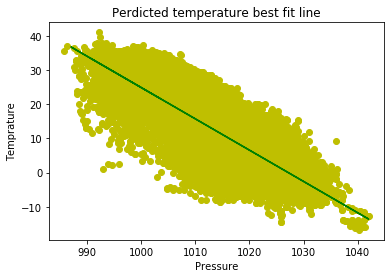

In [46]:

plt.scatter(test_x,test_y,color='y')
plt.plot(train_x,lin.predict(train_x),color='g')
plt.title('Perdicted temperature best fit line')
plt.xlabel('Pressure')
plt.ylabel('Temprature')